In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation
1.Above is our dataset which contains 907 rows and 27 columns

2.We have to make two separate prediction here i.e Primary Fuel and capacity_mw 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Observation
1.Columns estimated_generation_gwh,generation_gwh_2019,generation_gwh_2013,wepp_id,other_fuel2and other_fuel3 have no enteries ,it means no insights are available so we can drop them off.

2.There are nulls in our dataset we will fix them later

In [4]:
df.drop(columns=['estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel2','other_fuel3'],axis=1,inplace=True)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                861 non-null    float64
 6   longitude               861 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             198 non-null    object 
 9   commissioning_year      527 non-null    float64
 10  owner                   342 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      888 non-null    object 
 14  year_of_capacity_data   519 non-null    fl

In [7]:
df['country'].nunique()

1

In [8]:
df['country_long'].nunique()

1

In [9]:
df['name'].nunique()

907

In [10]:
df['gppd_idnr'].nunique()

907

In [11]:
df['url'].nunique()

304

# Observation
After checking unique values for country and country long we can see that there is only one unique value.

so no insights are available and we can drop them off.

Also there are 907 unique values for both i.e name and gppd_idnr so we can keep one of them and delete other.

Let's perform this task

In [12]:
df.drop(columns=['country','country_long','gppd_idnr'],axis=1,inplace=True)
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                861 non-null    float64
 3   longitude               861 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   other_fuel1             198 non-null    object 
 6   commissioning_year      527 non-null    float64
 7   owner                   342 non-null    object 
 8   source                  907 non-null    object 
 9   url                     907 non-null    object 
 10  geolocation_source      888 non-null    object 
 11  year_of_capacity_data   519 non-null    float64
 12  generation_gwh_2014     398 non-null    float64
 13  generation_gwh_2015     422 non-null    float64
 14  generation_gwh_2016     434 non-null    fl

In [15]:
df['primary_fuel'].nunique()

8

In [16]:
df['other_fuel1'].nunique()

3

In [17]:
df['commissioning_year'].nunique()

73

In [18]:
df['owner'].nunique()

280

In [19]:
df['url'].nunique()

304

In [20]:
df['geolocation_source'].nunique()

3

In [21]:
df['generation_data_source'].nunique()

1

# Observation
1.Here our target variable is primary_fuel which have 8 categories,so this is our multi class problem.

2.name,other_fuel1,geolocation source have dtype as object and have categorical data.

3.generation data source have only 1 unique values out of 449 enteries ,it means even after filling nan it will not give proper insights so we can drop it off.

4.latitude,longitude,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,commisiong year have dtype as float and have cont data.

5.owner,url,source have dtype as object but have discrete data.

In [22]:
#let's drop generation data source
df.drop(columns=['generation_data_source'],axis=1,inplace=True)
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isna().sum()

name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
other_fuel1              709
commissioning_year       380
owner                    565
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [25]:
df['owner'].mode()


0                      Acc Acc ltd
1                    Jk Cement ltd
2    Sterling Agro Industries ltd.
Name: owner, dtype: object

# There are nulls in our dataset

In [26]:
#let's fill null values
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['owner']=df['owner'].fillna(df['owner'].mode()[1])
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

In [27]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.000000,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,1997.091082,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,1997.091082,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.000000,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.000000,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,2016.000000,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,Oil,1997.091082,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,Oil,1997.091082,Jk Cement ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,Oil,1997.091082,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [28]:
df.isna().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# Observation
1.All our nulls are filled

2.Let's check statistics of our data

In [29]:
df['source'].nunique()

191

In [30]:
#let's encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == object:
        label = LabelEncoder()
        df[col] = label.fit_transform(df[col])

In [31]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,135.0,23.8712,91.3602,2,2,2004.000000,108,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,21.9603,82.4091,1,2,2015.000000,108,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,16.2949,77.3568,1,2,2016.000000,108,22,58,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903,3.0,12.8932,78.1654,6,2,1997.091082,114,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904,25.5,15.2758,75.5811,7,2,1997.091082,108,21,260,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905,80.0,24.3500,73.7477,1,2,1997.091082,91,59,82,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


# Observation
Here name column seems unnecessary ,so i m dropping it off

In [32]:
df.drop('name',axis=1,inplace=True)
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.000000,229,109,128,1,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,1997.091082,258,174,173,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,1997.091082,2,21,205,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.000000,108,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.000000,108,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,108,22,58,2,2019.0,2431.823590,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2,1997.091082,114,77,22,0,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,25.5,15.2758,75.5811,7,2,1997.091082,108,21,260,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,80.0,24.3500,73.7477,1,2,1997.091082,91,59,82,2,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [33]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,120.331863,43.847850,94.469680,1.733186,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,52.270069,44.642818,70.381222,0.677151,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,108.000000,22.000000,58.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,108.000000,22.000000,58.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,108.000000,29.500000,115.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,303.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [34]:
df['year_of_capacity_data'].nunique()

1

# Observation
1.Here after filling nulls our year of capacity data is giving unique value ,so we can drop it off.

2.All columns seems to have outliers.

3.Capacity_mw,longitude,owner,source ,url have mean >median,it means distribution id right skewed.

4.In latitude, commissioning_year distribution seems to be normal.

5.Rest all columns also seems to have normally distributed data.

But let's check through distribution plot for more clearance

In [35]:
df.drop('year_of_capacity_data',axis=1,inplace=True)
df.shape

(907, 15)

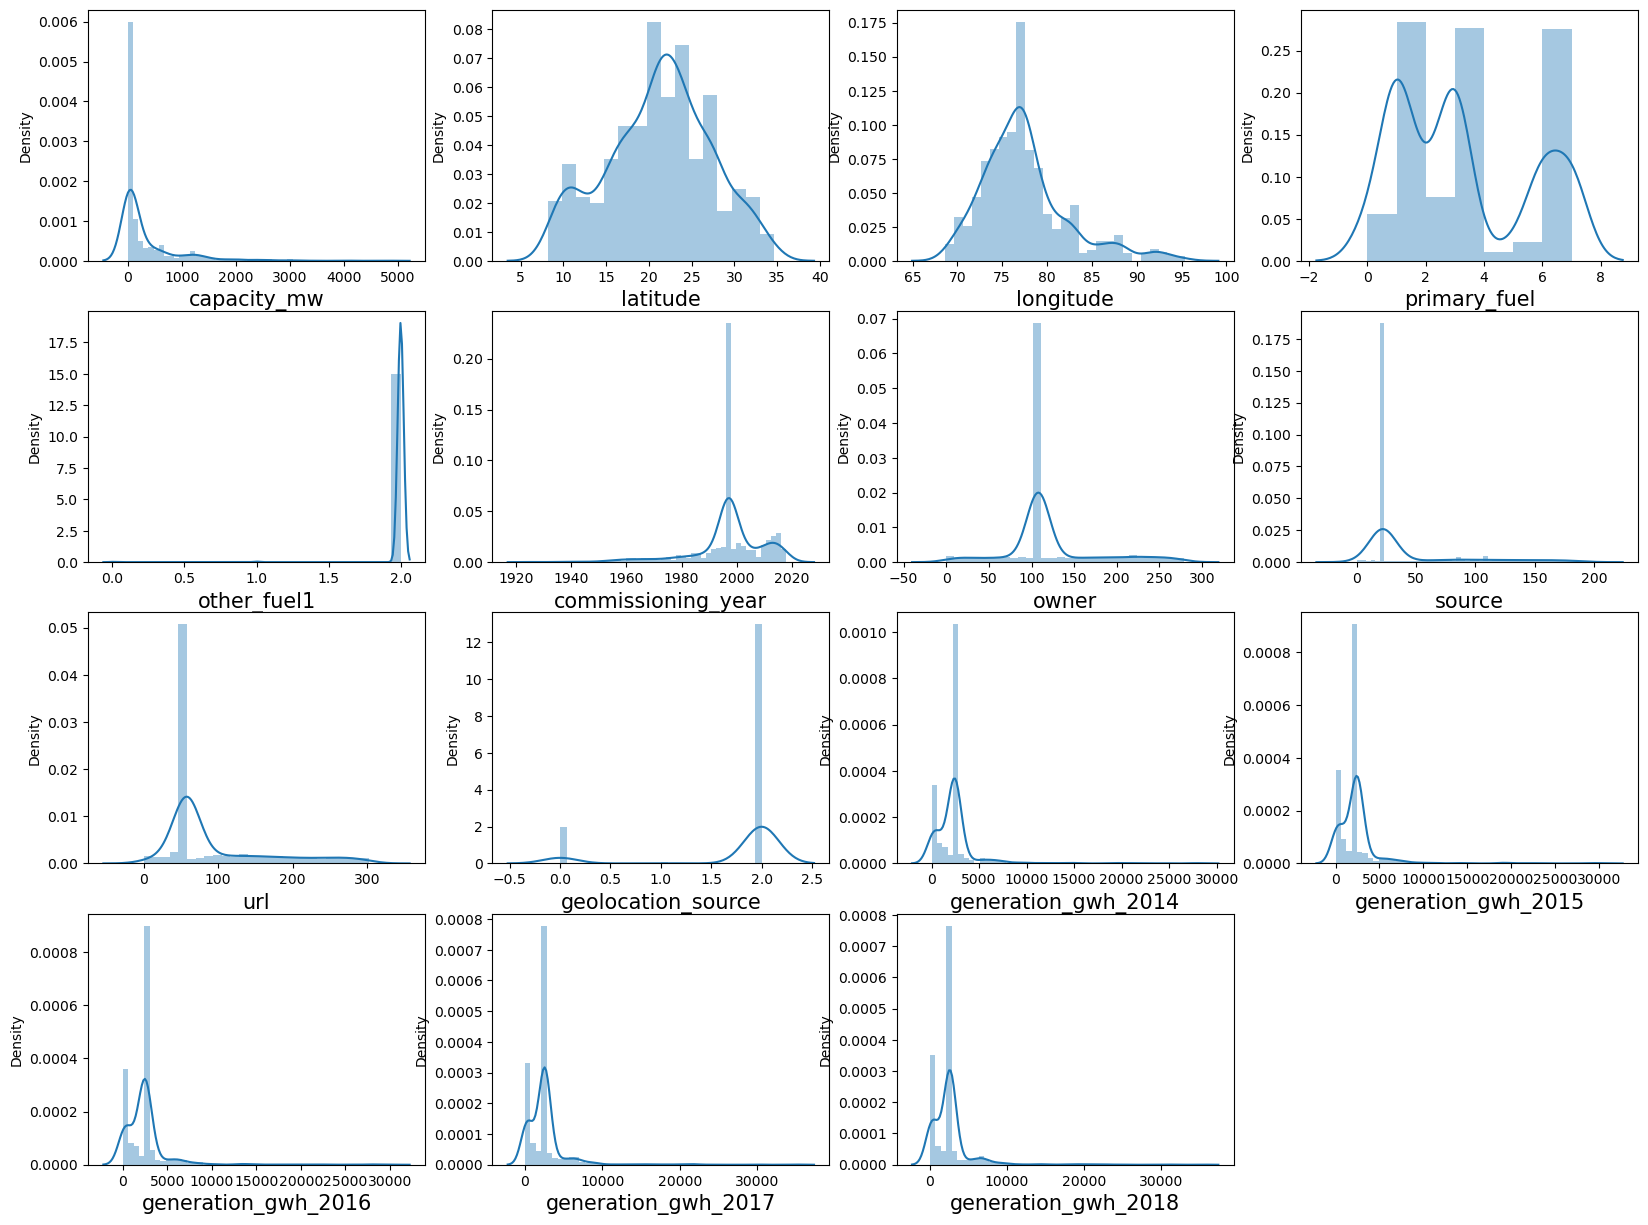

In [36]:
#lets build distplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
from displot we can observe that 

1.url,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 have right skewed data and have outliers also.

2.commissiong year have  right  skewness as well as outliers.

3.capacity_mw,latitude,longitude have right skewness as well as outliers.

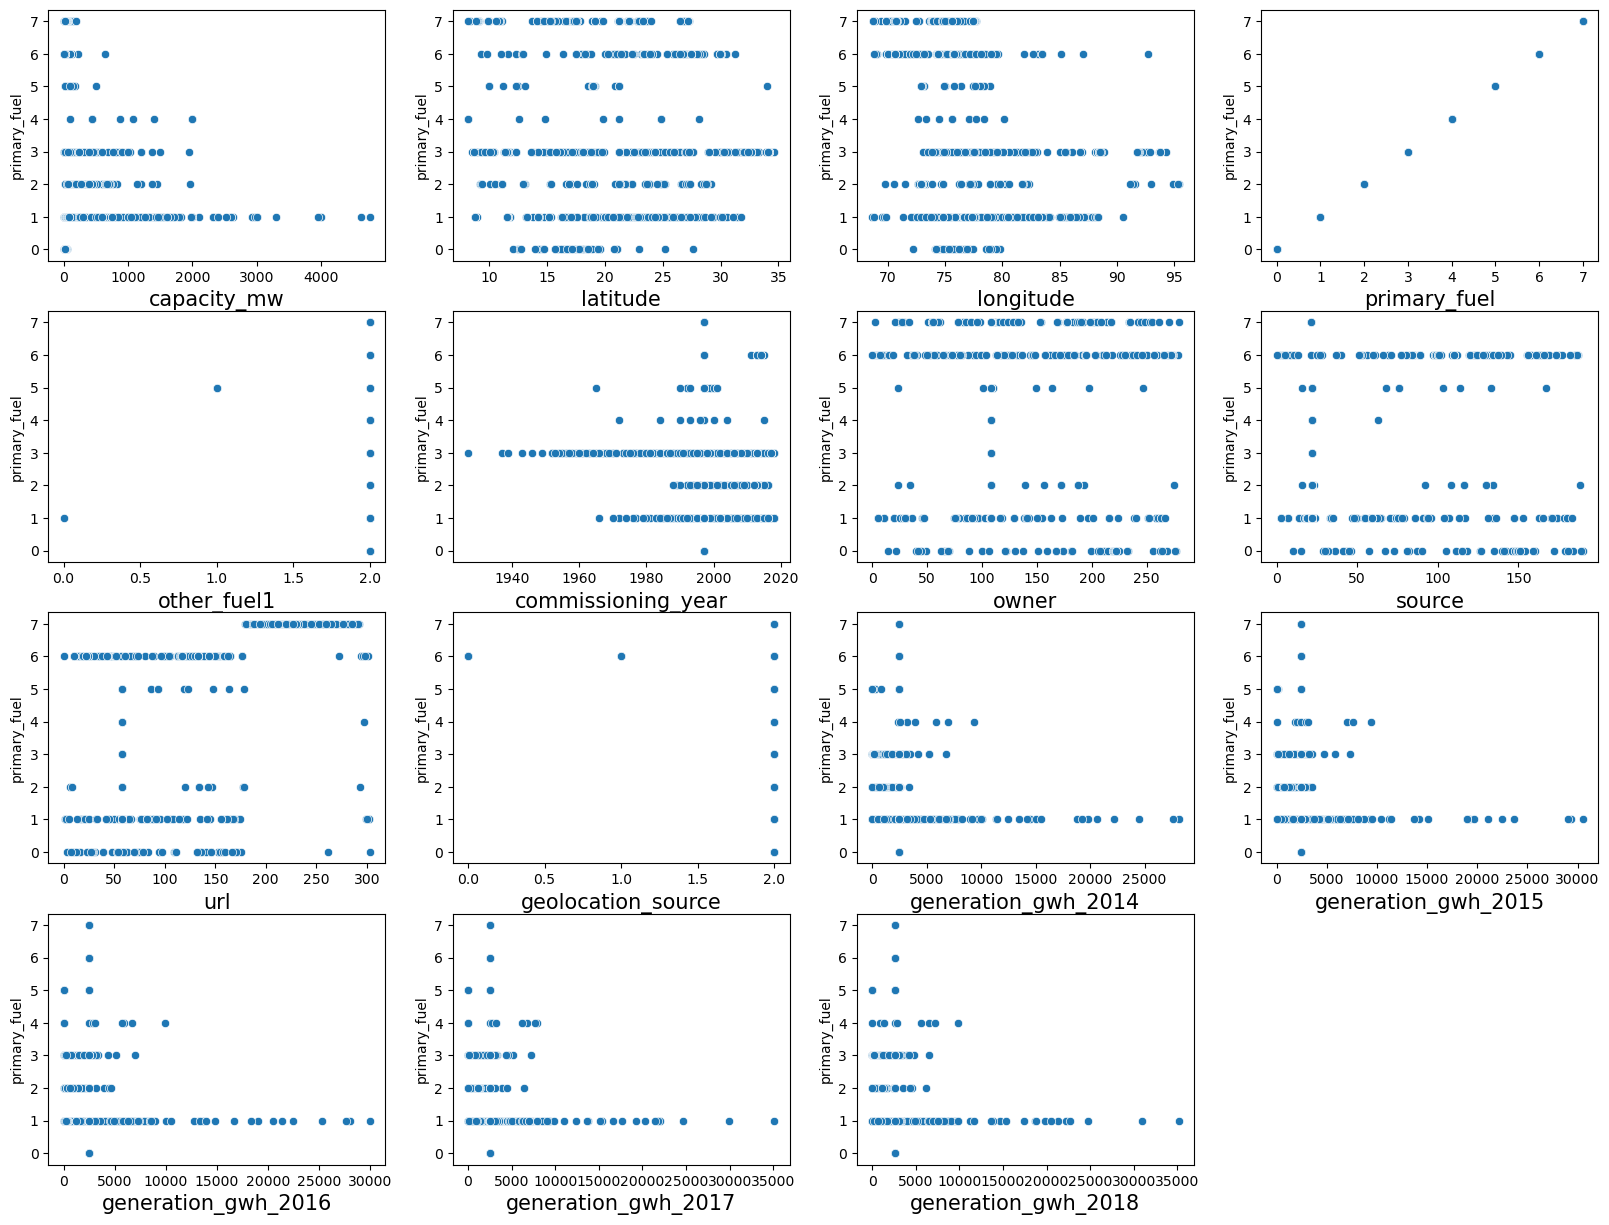

In [37]:
#lets build scatterplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=df[col],y=df['primary_fuel'],data=df)
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

# Observation
from above plot we can visualize relation between features and our label and it looks like all features are in relation with our label

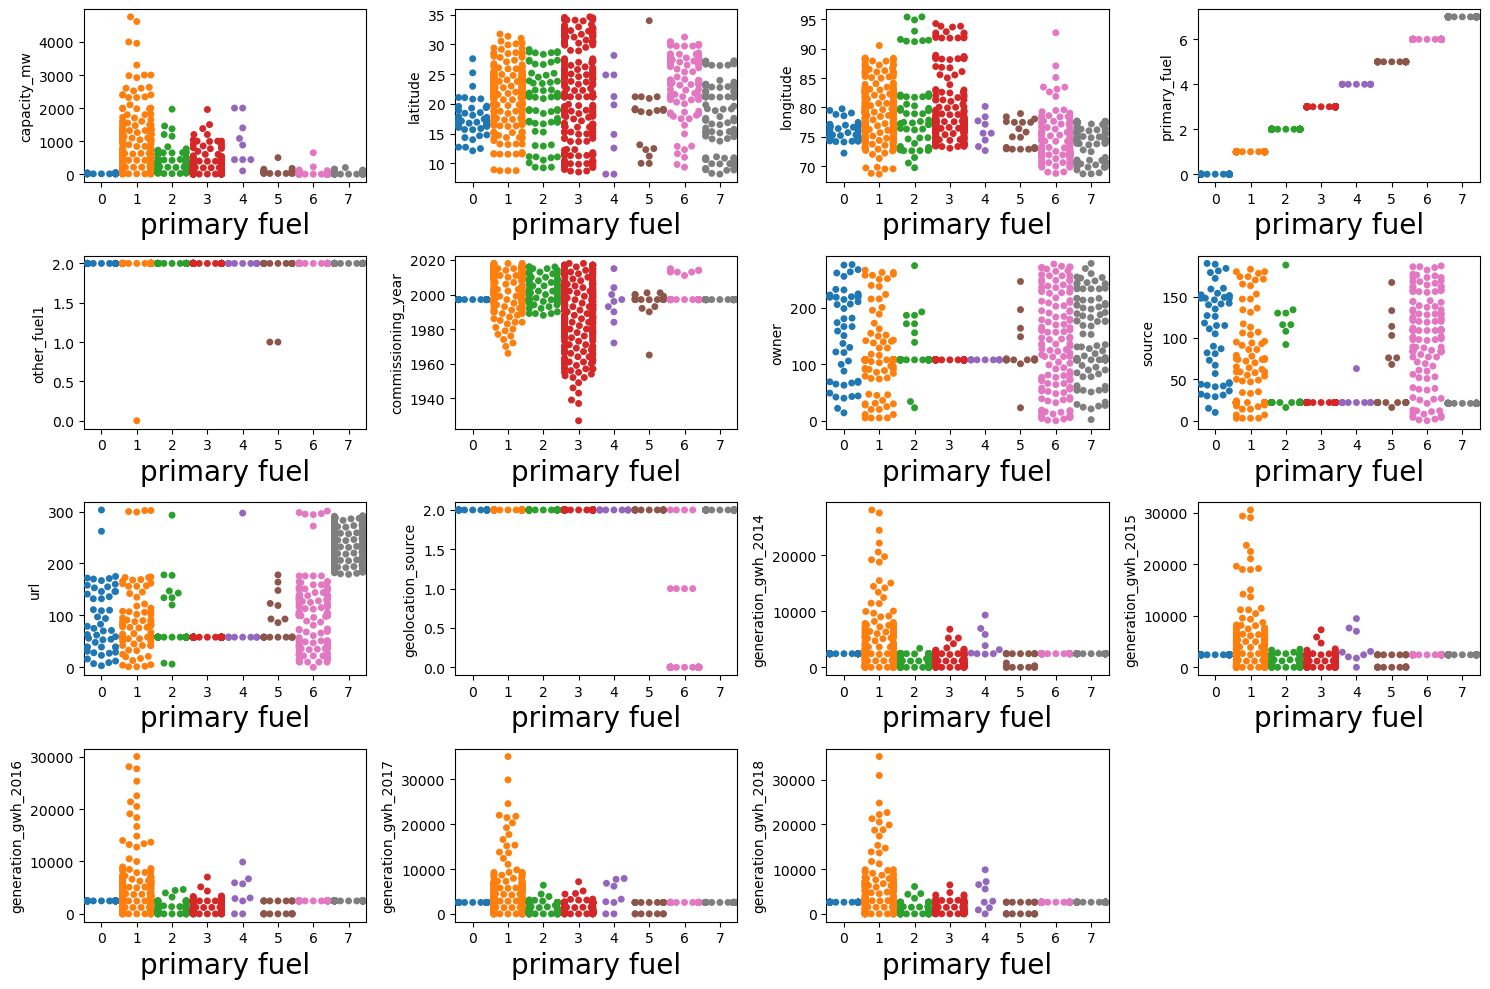

In [38]:
#lets see relation between features and our target variable
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df:
    if plotnumber<=15:
        ax = plt.subplot(4,4,plotnumber)
        sns.swarmplot(x=df['primary_fuel'],y=df[col],data=df)
        plt.xlabel('primary fuel', fontsize=20)
        plt.ylabel(col,fontsize=10)
    plotnumber+=1
plt.tight_layout()

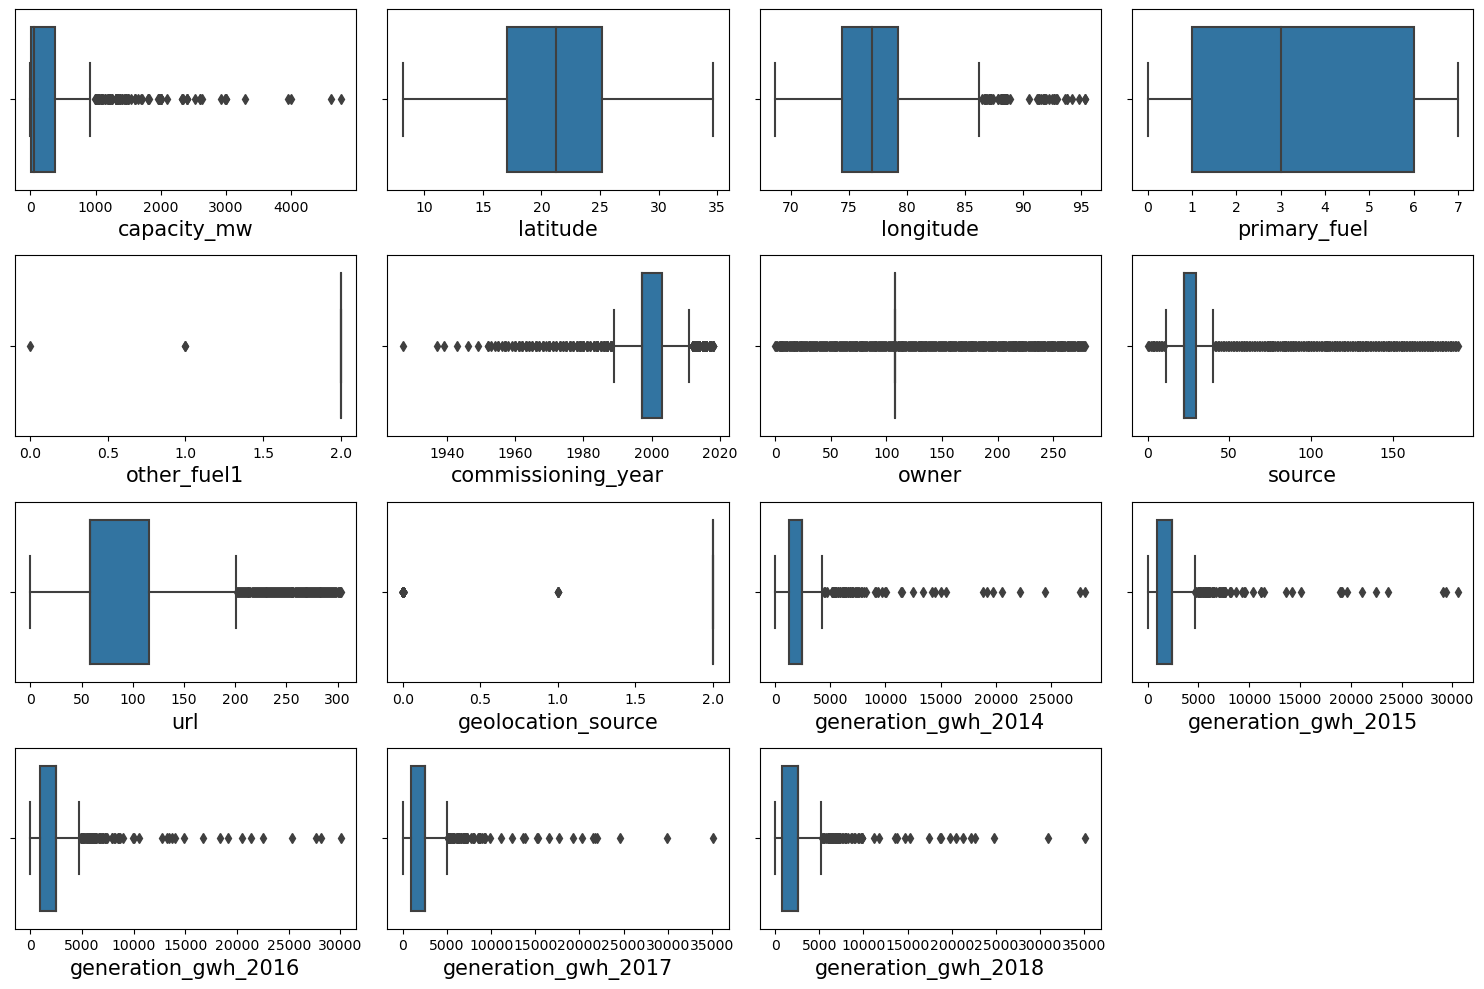

In [39]:
#lets see boxplot for each column
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df:
    if plotnumber<=15:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# Observation
All columns are having outliers except latitude columns so let's remove outliers from numerical columns

In [40]:
from scipy.stats import zscore

In [41]:
col=df[['capacity_mw','longitude','commissioning_year','owner','source','url','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]
z_score=np.abs(zscore(col))
z_score

,capacity_mw,longitude,commissioning_year,owner,source,url,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0.548908,0.878280,1.069162e+00,2.080121,1.460215,0.476673,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
1,0.386977,0.593788,1.747794e-14,2.635238,2.917019,1.116401,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
2,0.486679,1.682394,1.747794e-14,2.265104,0.512075,1.571318,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
3,0.324240,2.889052,5.310801e-01,0.236056,0.489662,0.518459,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01
4,2.498942,1.027976,1.376637e+00,0.236056,0.489662,0.518459,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00
...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.022477,1.453505e+00,0.236056,0.489662,0.518459,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01
903,0.548060,0.145644,1.747794e-14,0.121204,0.743019,1.030242,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
904,0.509909,0.391673,1.747794e-14,0.236056,0.512075,2.353208,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16
905,0.417498,0.772866,1.747794e-14,0.561469,0.339596,0.177271,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16


In [42]:
np.where(z_score>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 222, 244,
        246, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
        345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
        444, 454, 478, 482, 484, 493, 493, 493, 493, 493, 493, 494, 494,
        494, 494, 494, 494, 499, 519, 538, 541, 546, 573, 577, 583, 592,
        601, 621, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
        657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 706, 709,
        721, 721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726,
        726, 726, 728, 767, 786, 786, 786, 786, 786, 786, 788, 807, 808,
        808, 808, 808, 808, 808, 818, 832, 847, 848, 870, 871, 879, 880,
        880, 880, 880, 880, 880, 895, 900, 906], dtype=int64),
 array([ 0,  7,  8,  9, 10,  4,  4,  0,  6,  7,  8,  9, 10,  0,  6,  1,  1,
         4,  0,  6,  7,  8,  9, 10,  2,  1,  3,  4,  0,  6

In [43]:
df1=df[(z_score<3).all(axis=1)]
df1.shape

(832, 15)

In [44]:
#let's check for dataloss
print('Data loss is :',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss is : 8.26901874310915


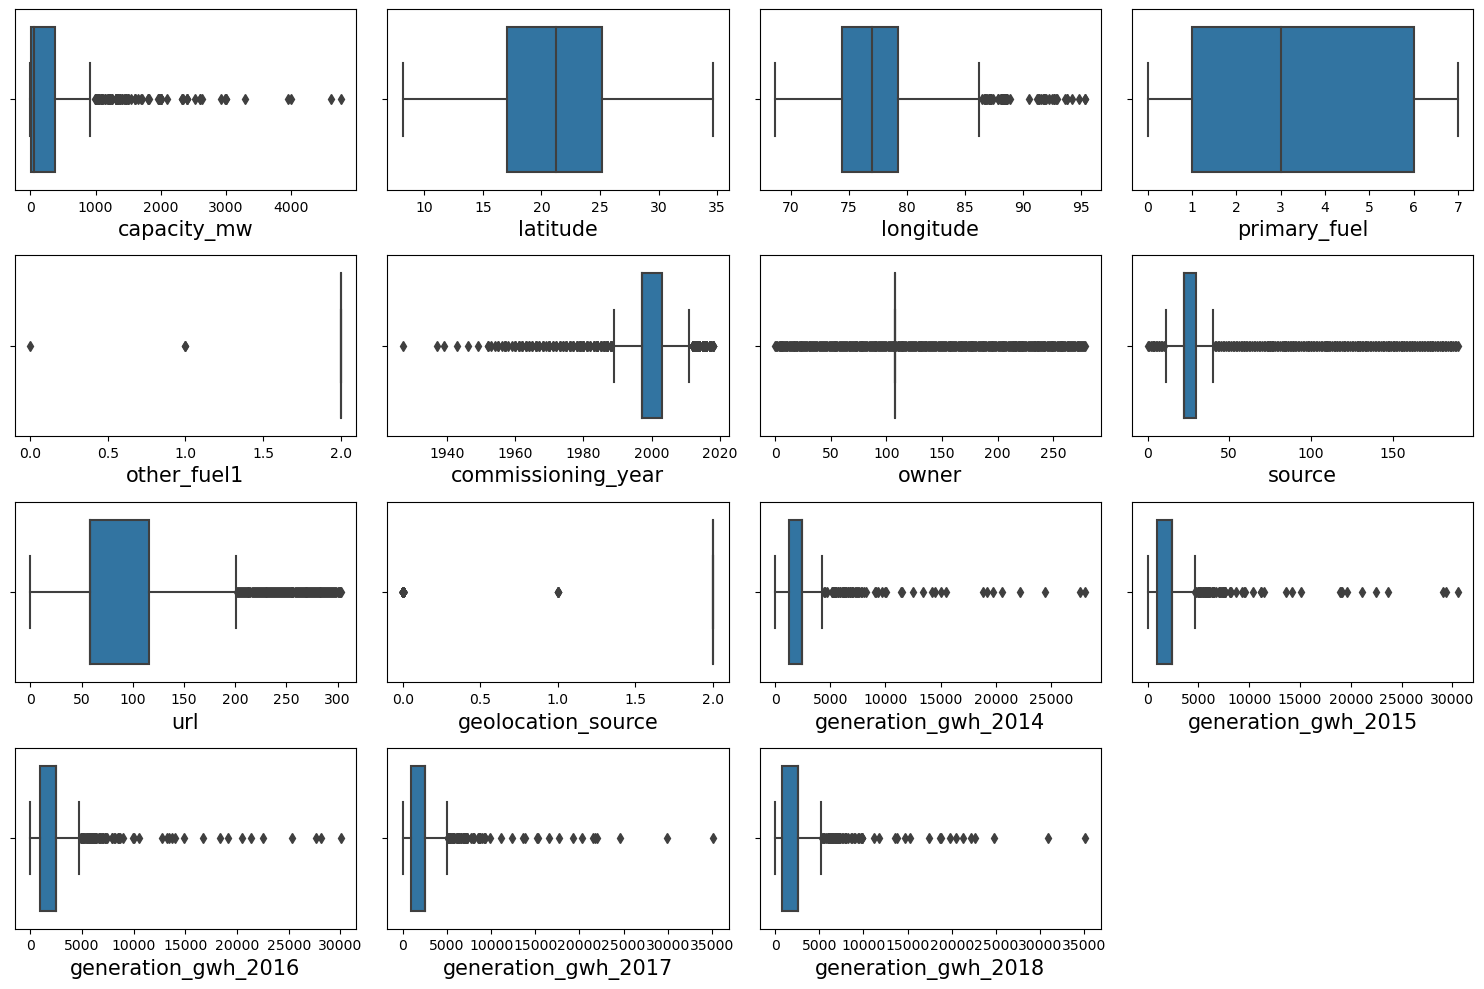

In [45]:
#lets see boxplot for each column
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df:
    if plotnumber<=15:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# Observation
After removing outliers our data loss is fine.

But still there are many outliers and if we will remove all outliers then we will be left with very less data.

so i m keeping them.

In [46]:
#let's check for skewness
df1.skew()

capacity_mw             1.949169
latitude               -0.108799
longitude               0.909805
primary_fuel            0.417699
other_fuel1           -19.585903
commissioning_year     -0.841661
owner                   0.854271
source                  1.789168
url                     1.438552
geolocation_source     -2.114897
generation_gwh_2014     1.522795
generation_gwh_2015     1.388410
generation_gwh_2016     1.411056
generation_gwh_2017     1.277994
generation_gwh_2018     1.315064
dtype: float64

# except for our latitude column all are having skewness let's remove skewness using power transformer technique

In [47]:
from sklearn.preprocessing import PowerTransformer

In [48]:
features=['capacity_mw','longitude','commissioning_year','owner','source','url','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
scale=PowerTransformer()

In [49]:
df1[features]=scale.fit_transform(df1[features].values)

In [50]:
df1.skew()

capacity_mw             0.011667
latitude               -0.108799
longitude              -0.000442
primary_fuel            0.417699
other_fuel1           -19.585903
commissioning_year      0.026939
owner                   0.187578
source                 -0.180093
url                     0.065379
geolocation_source     -2.114897
generation_gwh_2014    -0.250747
generation_gwh_2015    -0.313576
generation_gwh_2016    -0.313093
generation_gwh_2017    -0.343796
generation_gwh_2018    -0.357107
dtype: float64

# Observation
Ideal skewness range is -0.5 to 0.5.

All columns have skewness in this range only except for catg columns

Let's check distplot and box plot

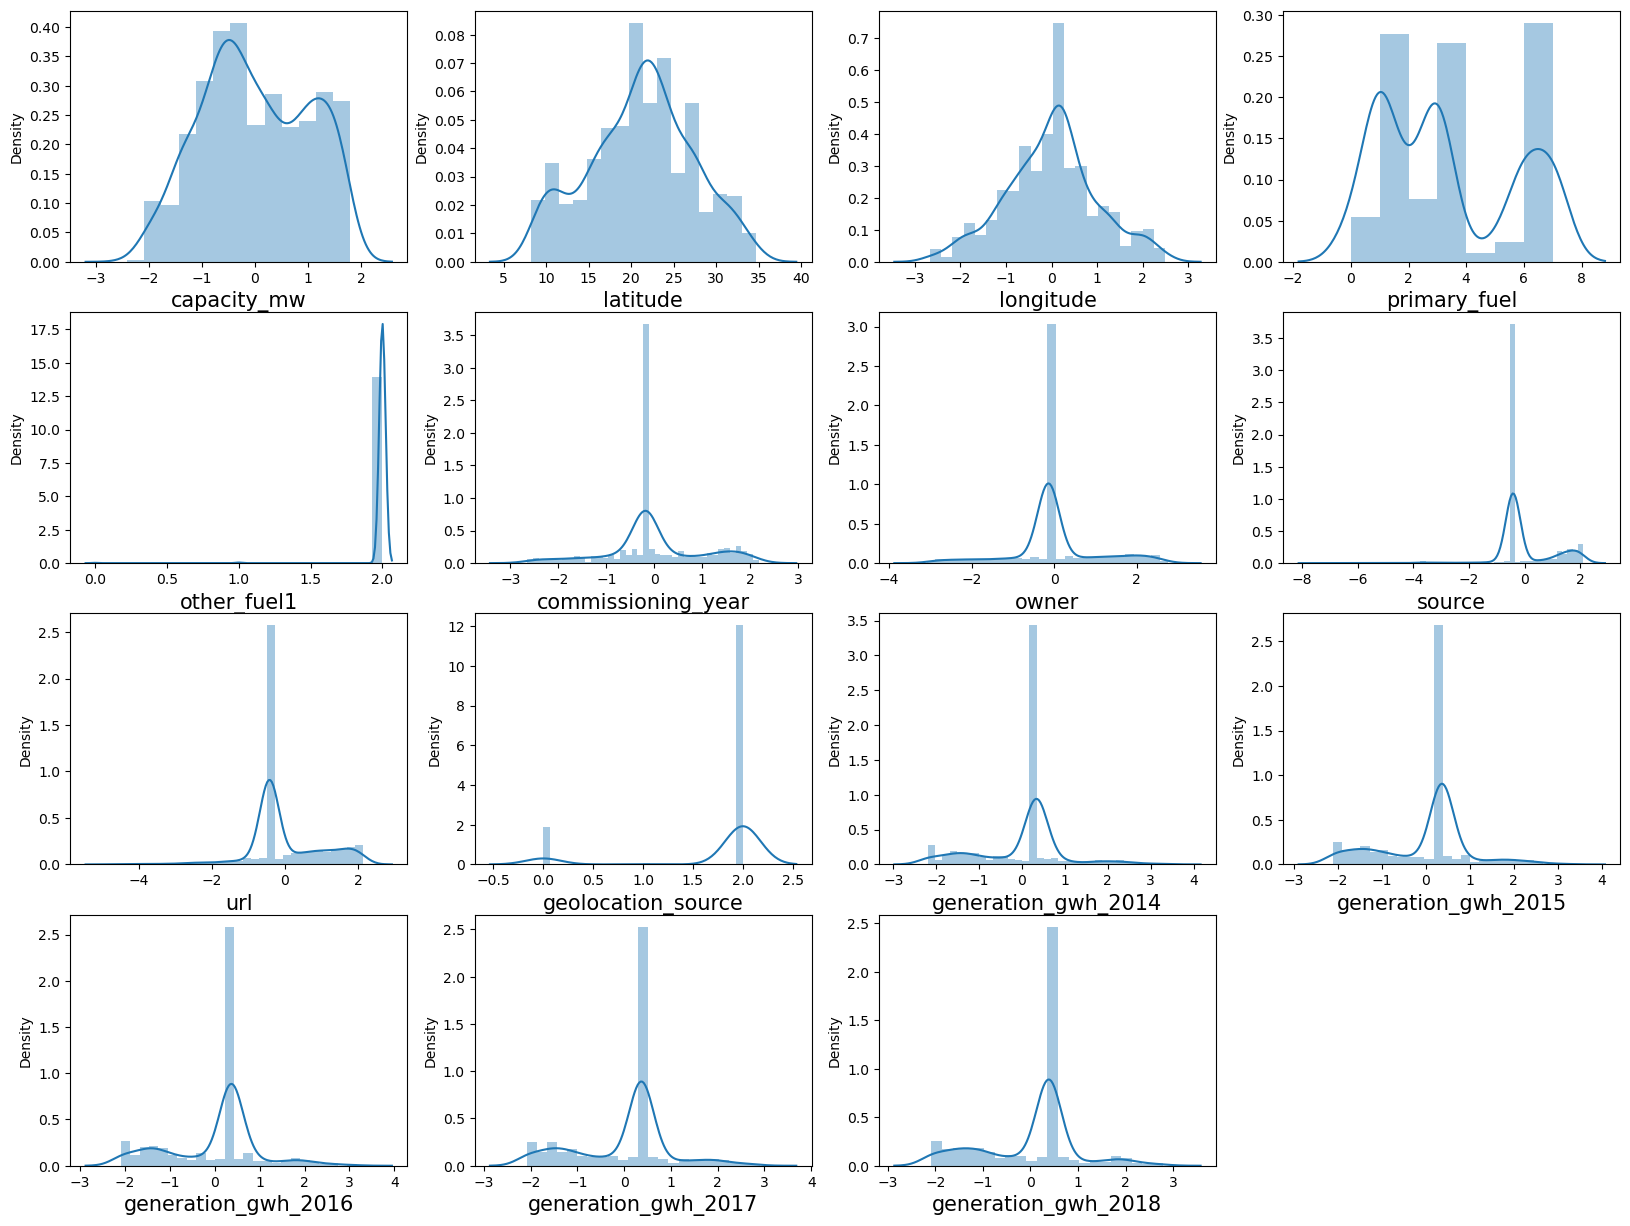

In [51]:
#lets build distplot
plt.figure(figsize=(20,15))
plotnumber=1
for col in df1:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df1[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1   
plt.show()    

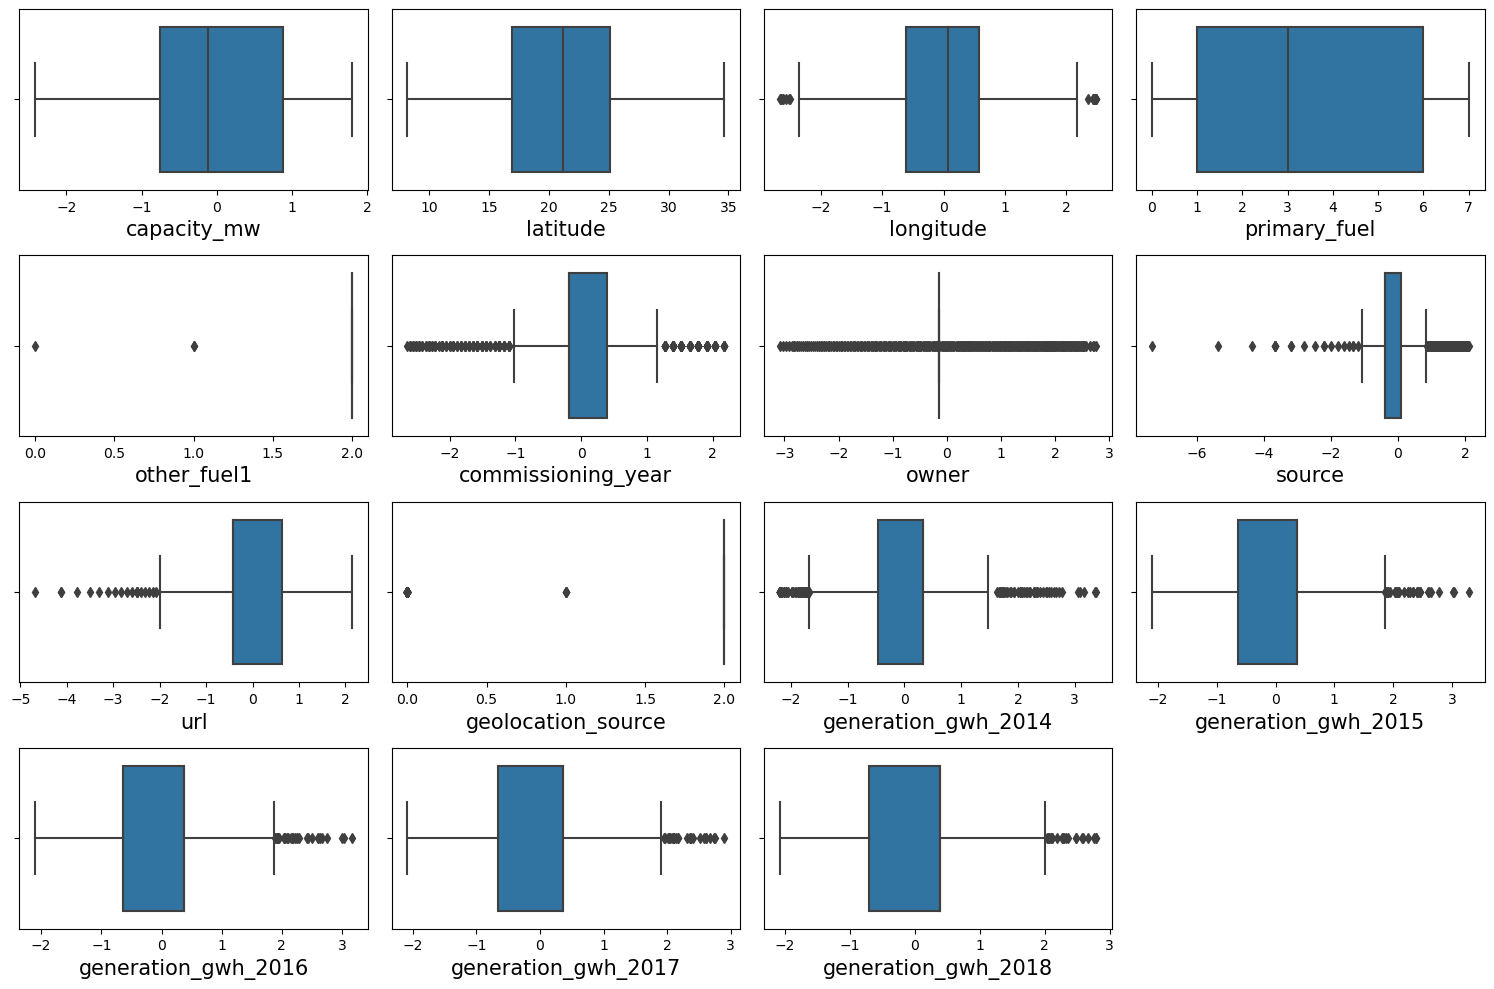

In [52]:
#lets see boxplot for each column
plt.figure(figsize=(15,10))
plotnumber = 1
for col in df1:
    if plotnumber<=15:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df1[col])
        plt.xlabel(col, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

In [53]:
df1

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.677386,28.1839,-0.930382,6,2,1.277262,2.051126,1.616515,0.723896,1,0.333233,0.362801,0.366213,0.366939,0.382124
1,0.206823,24.7663,-0.514200,1,2,-0.184779,2.522497,2.090827,1.199266,2,0.333233,0.362801,0.366213,0.366939,0.382124
2,-0.289335,21.9038,-2.352306,7,2,-0.184779,-2.965055,-0.467352,1.476795,2,0.333233,0.362801,0.366213,0.366939,0.382124
3,0.379586,23.8712,2.443896,2,2,0.492195,-0.140517,-0.399150,-0.424639,2,-1.026806,-0.712738,-0.665424,-0.885225,-0.905152
4,1.746500,21.9603,1.246524,1,2,1.776011,-0.140517,-0.399150,-0.424639,2,0.666965,1.876215,1.912559,1.549633,2.094962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.252247,13.1156,0.266154,5,2,-0.544753,-0.140517,-0.399150,-0.424639,2,-2.197548,-2.104460,-2.097628,0.366939,-2.080408
902,1.685688,16.2949,0.211975,1,2,1.906838,-0.140517,-0.399150,-0.424639,2,0.333233,-2.086706,-1.400084,-0.702208,-0.847117
903,-1.599755,12.8932,0.401291,6,2,-0.184779,-0.019672,1.232176,-1.643843,0,0.333233,0.362801,0.366213,0.366939,0.382124
904,-0.521684,15.2758,-0.241628,7,2,-0.184779,-0.140517,-0.467352,1.877566,2,0.333233,0.362801,0.366213,0.366939,0.382124


In [54]:
#let's check corelation
corr=df1.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050607,0.341599,-0.534649,-0.042191,0.314575,-0.138336,-0.320210,-0.275464,0.475729,0.012636,-0.011767,0.010361,0.009904,-0.002794
latitude,0.050607,1.000000,-0.069945,-0.007517,0.037150,0.110346,-0.068801,0.056441,-0.111890,-0.192471,0.053451,0.040513,0.045211,0.024393,0.031521
longitude,0.341599,-0.069945,1.000000,-0.417107,0.028351,0.190181,-0.100674,-0.200435,-0.274809,0.306549,-0.117208,-0.136959,-0.096154,-0.108011,-0.102256
primary_fuel,-0.534649,-0.007517,-0.417107,1.000000,0.006957,-0.200627,0.108100,0.018813,0.532804,-0.470564,0.043446,0.053813,0.043030,0.053623,0.054900
other_fuel1,-0.042191,0.037150,0.028351,0.006957,1.000000,0.044945,0.007968,0.022634,0.024079,-0.022711,0.040161,0.053927,0.063539,0.030011,0.070738
commissioning_year,0.314575,0.110346,0.190181,-0.200627,0.044945,1.000000,-0.024484,-0.039740,-0.059185,0.062222,0.072758,0.082395,0.131005,0.096048,0.093275
owner,-0.138336,-0.068801,-0.100674,0.108100,0.007968,-0.024484,1.000000,0.526142,0.302694,-0.040437,0.046825,0.050980,0.051459,0.051561,0.053695
source,-0.320210,0.056441,-0.200435,0.018813,0.022634,-0.039740,0.526142,1.000000,0.141565,-0.394007,0.133010,0.144812,0.146174,0.146464,0.152525
url,-0.275464,-0.111890,-0.274809,0.532804,0.024079,-0.059185,0.302694,0.141565,1.000000,0.019230,0.141504,0.154060,0.155508,0.155817,0.162265
geolocation_source,0.475729,-0.192471,0.306549,-0.470564,-0.022711,0.062222,-0.040437,-0.394007,0.019230,1.000000,-0.133462,-0.145304,-0.146670,-0.146961,-0.153043


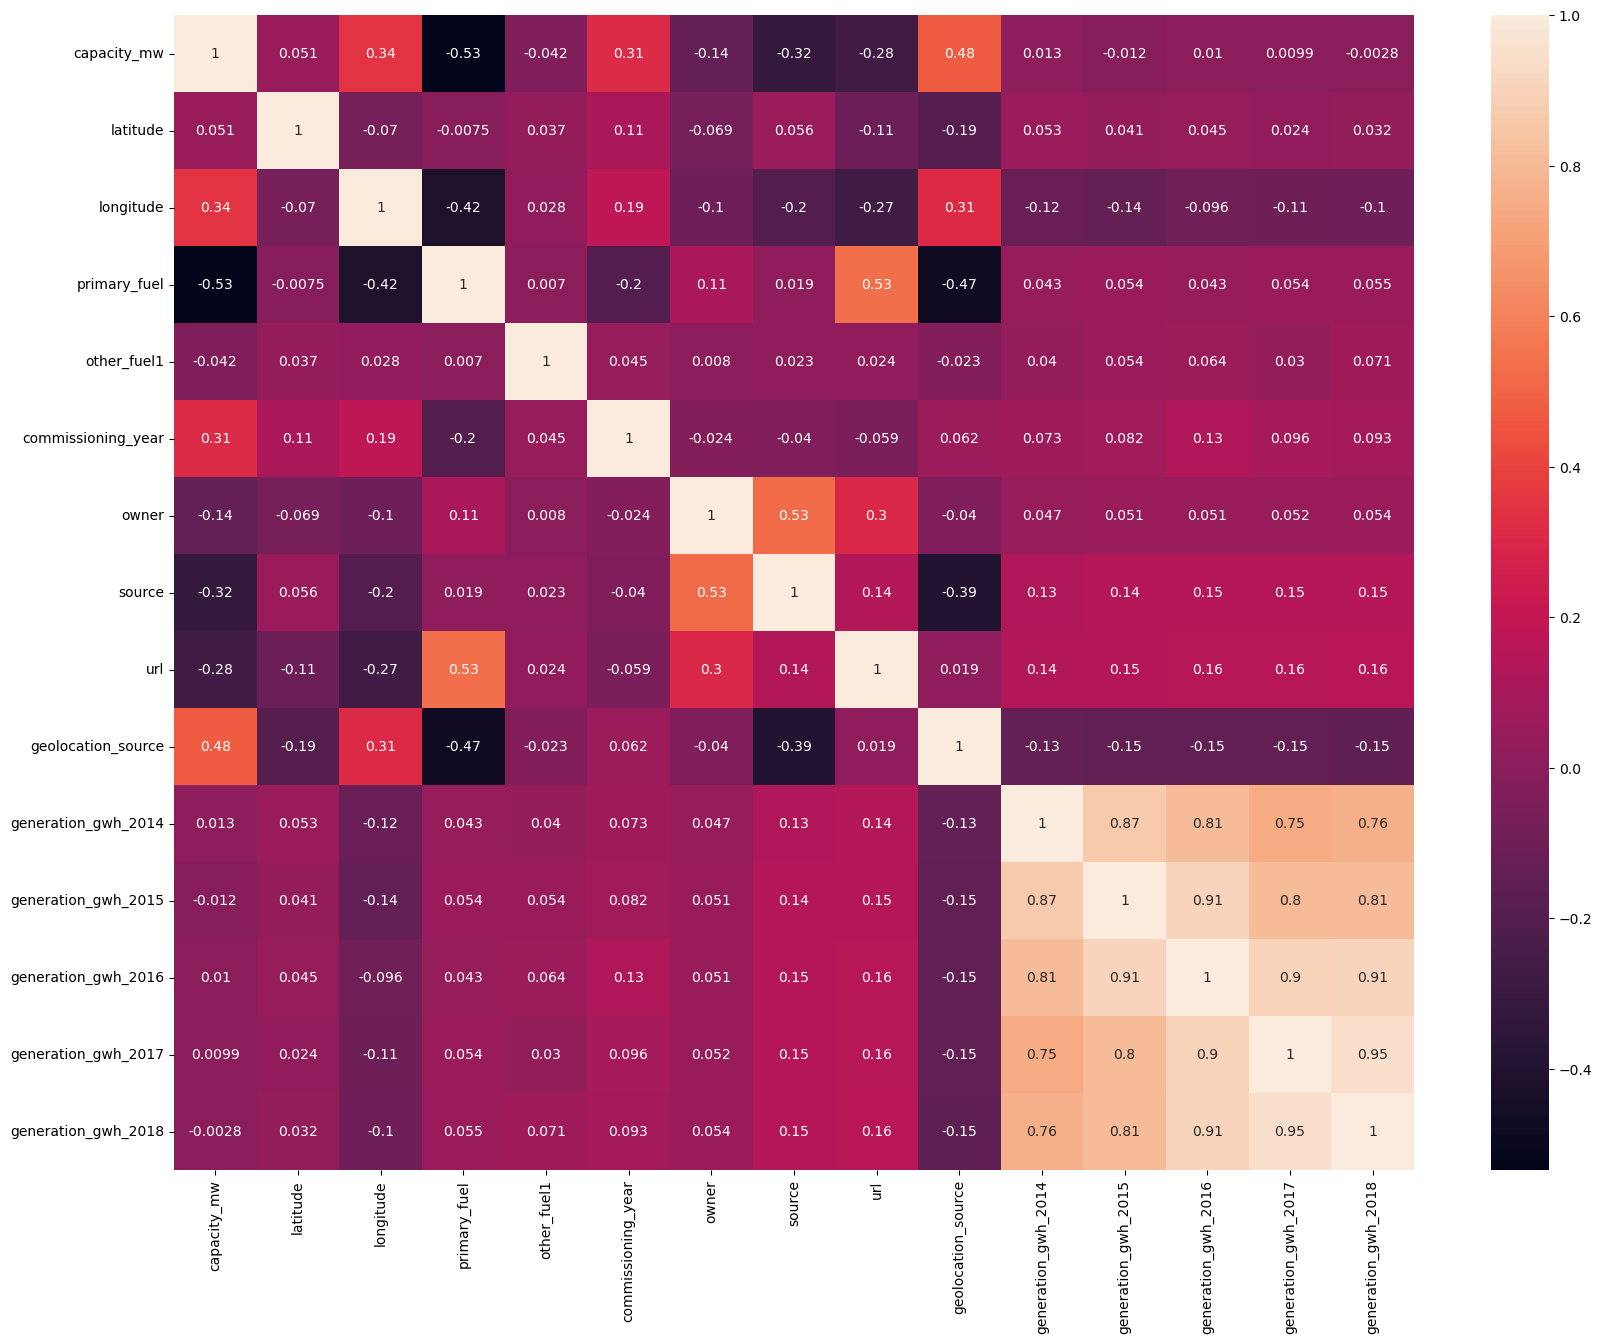

In [55]:
#let's plot heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

# Observation
1.latitude and other_fuel1 are in very less relation with our label.

2.capacity_mw,longitude,commissioning_year,geolocation_source,source are in -ve relation with our label

3.owner,source,url,generation_gwh_2014,2015,2016,2017,2018 are in +ve relation with our label

4.generation_gwh_2014,2015,2016,2017,2018 are in high corelation.

let's check through scatter plot

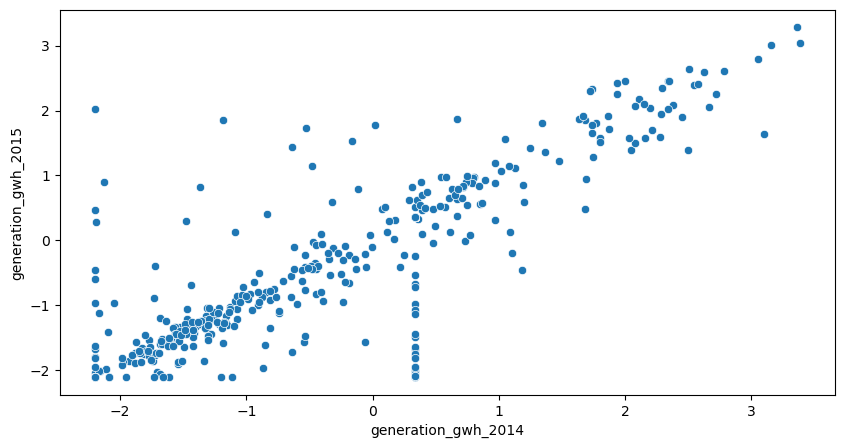

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df1['generation_gwh_2014'],y=df1['generation_gwh_2015'],data=df1)
plt.show()

# Observation
There seems to be a linear relation between both

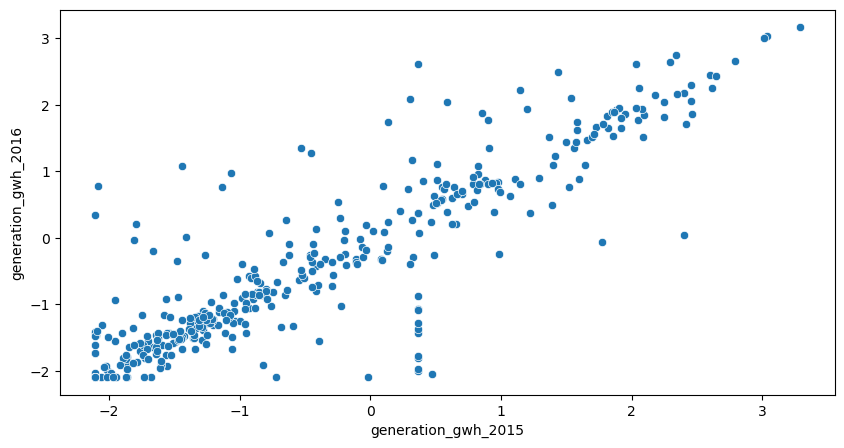

In [57]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df1['generation_gwh_2015'],y=df1['generation_gwh_2016'],data=df1)
plt.show()

# Observation
Here also it shows linear relation

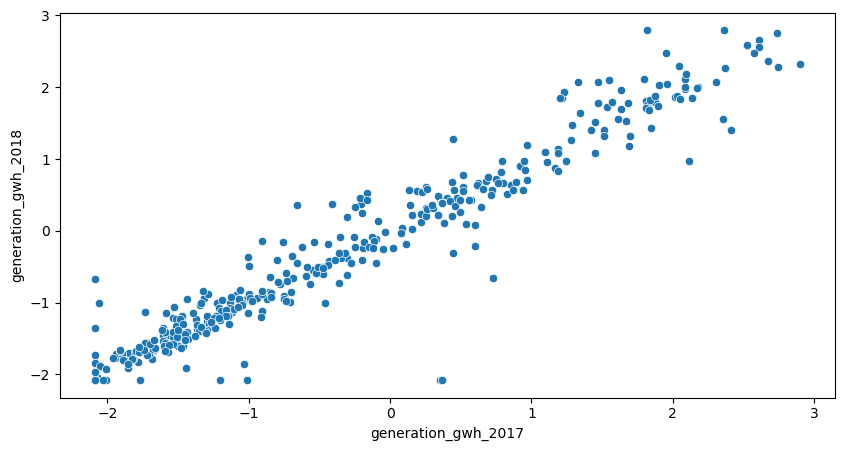

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df1['generation_gwh_2017'],y=df1['generation_gwh_2018'],data=df1)
plt.show()

# Here both shows strong linear relation so we can drop one,but let's explore more

In [59]:
#lets separate features and label
X=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']

In [60]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']= X.columns
#let's check for value
vif

,vif,features
0,1.722353,capacity_mw
1,13.818434,latitude
2,1.285055,longitude
3,27.962426,other_fuel1
4,1.180013,commissioning_year
5,1.566292,owner
6,1.762424,source
7,1.340852,url
8,12.133820,geolocation_source
9,4.174501,generation_gwh_2014


# Observation
VIF value ,i have taken is till 10 ans vif value for latitude,other_fuel1,geolocation_source,generation_gwh_2018 have greater value so let's delete them.

generation_gwh_2016,generation_gwh_2017 also have value greater than 10 but i m keeping them because value is not much greater

In [61]:
X.drop(columns=['latitude','other_fuel1','geolocation_source','generation_gwh_2018'],axis=1,inplace=True)
X.shape

(832, 10)

In [62]:
#Lets use vif method to check multicollinearity issue
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']= X.columns
#let's check for value
vif

,vif,features
0,1.407348,capacity_mw
1,1.227928,longitude
2,1.158288,commissioning_year
3,1.526813,owner
4,1.599381,source
5,1.271537,url
6,4.130088,generation_gwh_2014
7,7.954572,generation_gwh_2015
8,10.944881,generation_gwh_2016
9,5.538927,generation_gwh_2017


# Let's check for feature selection

In [63]:
from sklearn.feature_selection import SelectKBest,f_classif

In [64]:
best=SelectKBest(score_func=f_classif,k=10)
fit=best.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature=pd.concat([df_columns,df_scores],axis=1)
feature.columns=['feat_name','Score']
print(feature.nlargest(10,'Score'))

             feat_name       Score
5                  url  124.062604
0          capacity_mw  114.914137
4               source   54.314761
8  generation_gwh_2016   46.011034
9  generation_gwh_2017   44.327172
6  generation_gwh_2014   40.255477
7  generation_gwh_2015   38.332701
1            longitude   36.971403
2   commissioning_year   24.080366
3                owner    5.503034


# Observation
here i m keeping all features because already many features are dropped and here also it is giving genuine score

# Modelling

In [65]:
from sklearn.model_selection import train_test_split
#lets split data into train and test
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=110)

In [66]:
#import lib
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [67]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("=======Train Result======")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n===Test Result====")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print('\n\nTest Classification Report\n',classification_report(y_test,pred,digits=2))

In [68]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.53%

===Test Result====
Accuracy Score:68.75%


Test Classification Report
               precision    recall  f1-score   support

           0       0.27      0.44      0.33         9
           1       0.62      0.77      0.69        62
           2       0.62      0.25      0.36        20
           3       0.76      0.67      0.71        55
           4       0.00      0.00      0.00         3
           5       0.20      0.50      0.29         2
           6       0.88      0.71      0.79        31
           7       0.93      1.00      0.96        26

    accuracy                           0.69       208
   macro avg       0.53      0.54      0.52       208
weighted avg       0.70      0.69      0.68       208



In [70]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
metric_score(tree,x_train,x_test,y_train,y_test,train=True)
metric_score(tree,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:74.52%


Test Classification Report
               precision    recall  f1-score   support

           0       0.50      0.44      0.47         9
           1       0.73      0.71      0.72        62
           2       0.44      0.40      0.42        20
           3       0.82      0.84      0.83        55
           4       0.00      0.00      0.00         3
           5       0.29      1.00      0.44         2
           6       0.83      0.81      0.82        31
           7       0.96      1.00      0.98        26

    accuracy                           0.75       208
   macro avg       0.57      0.65      0.59       208
weighted avg       0.75      0.75      0.74       208



In [72]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)

BaggingClassifier()

In [73]:
metric_score(bag,x_train,x_test,y_train,y_test,train=True)
metric_score(bag,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:98.88%

===Test Result====
Accuracy Score:75.96%


Test Classification Report
               precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.67      0.85      0.75        62
           2       0.67      0.40      0.50        20
           3       0.86      0.78      0.82        55
           4       0.00      0.00      0.00         3
           5       0.20      0.50      0.29         2
           6       0.89      0.77      0.83        31
           7       0.96      1.00      0.98        26

    accuracy                           0.76       208
   macro avg       0.58      0.58      0.56       208
weighted avg       0.76      0.76      0.75       208



In [74]:
rand=RandomForestClassifier()
rand.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
metric_score(rand,x_train,x_test,y_train,y_test,train=True)
metric_score(rand,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:73.56%


Test Classification Report
               precision    recall  f1-score   support

           0       0.22      0.22      0.22         9
           1       0.69      0.82      0.75        62
           2       0.80      0.20      0.32        20
           3       0.79      0.84      0.81        55
           4       0.00      0.00      0.00         3
           5       0.20      0.50      0.29         2
           6       0.77      0.74      0.75        31
           7       0.96      1.00      0.98        26

    accuracy                           0.74       208
   macro avg       0.55      0.54      0.52       208
weighted avg       0.74      0.74      0.72       208



In [76]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [77]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:55.29%

===Test Result====
Accuracy Score:53.85%


Test Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.50      0.06      0.11        62
           2       0.00      0.00      0.00        20
           3       0.47      1.00      0.64        55
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.47      0.87      0.61        31
           7       0.96      1.00      0.98        26

    accuracy                           0.54       208
   macro avg       0.30      0.37      0.29       208
weighted avg       0.47      0.54      0.42       208



In [78]:
grad=GradientBoostingClassifier()
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [79]:
metric_score(grad,x_train,x_test,y_train,y_test,train=True)
metric_score(grad,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:76.44%


Test Classification Report
               precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.71      0.79      0.75        62
           2       0.58      0.35      0.44        20
           3       0.82      0.85      0.84        55
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         2
           6       0.90      0.84      0.87        31
           7       0.96      1.00      0.98        26

    accuracy                           0.76       208
   macro avg       0.66      0.56      0.59       208
weighted avg       0.77      0.76      0.76       208



In [80]:
support=SVC()
support.fit(x_train,y_train)

SVC()

In [81]:
metric_score(support,x_train,x_test,y_train,y_test,train=True)
metric_score(support,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:78.53%

===Test Result====
Accuracy Score:70.19%


Test Classification Report
               precision    recall  f1-score   support

           0       0.09      0.11      0.10         9
           1       0.64      0.82      0.72        62
           2       1.00      0.05      0.10        20
           3       0.76      0.80      0.78        55
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.77      0.74      0.75        31
           7       0.96      1.00      0.98        26

    accuracy                           0.70       208
   macro avg       0.53      0.44      0.43       208
weighted avg       0.73      0.70      0.67       208



In [82]:
model=xgb.XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [83]:
metric_score(model,x_train,x_test,y_train,y_test,train=True)
metric_score(model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:100.00%

===Test Result====
Accuracy Score:77.40%


Test Classification Report
               precision    recall  f1-score   support

           0       0.38      0.56      0.45         9
           1       0.75      0.82      0.78        62
           2       0.67      0.40      0.50        20
           3       0.84      0.85      0.85        55
           4       0.00      0.00      0.00         3
           5       0.20      0.50      0.29         2
           6       0.85      0.74      0.79        31
           7       0.96      1.00      0.98        26

    accuracy                           0.77       208
   macro avg       0.58      0.61      0.58       208
weighted avg       0.78      0.77      0.77       208



# Observation
As per our model performance ,xgboost model is performing best with accuracy score of 77.40

Let's use cross val tech to validate our model performance

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
#lets check for knn model
pred1=knn.predict(x_test)
score1=cross_val_score(knn,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred1)-score1)

Difference is ; -0.03724568934420314


In [86]:
#lets check for decision tree model
pred2=tree.predict(x_test)
score2=cross_val_score(tree,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred2)-score2)

Difference is ; 0.022820184468875127


In [87]:
#lets check for bagging model
pred3=bag.predict(x_test)
score3=cross_val_score(bag,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred3)-score3)

Difference is ; -0.01923174041166975


In [88]:
#lets check for random forest model
pred4=rand.predict(x_test)
score4=cross_val_score(rand,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred4)-score4)

Difference is ; -0.06367277030739249


In [89]:
# lets check for ada boost model
pred5=ada.predict(x_test)
score5=cross_val_score(ada,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred5)-score5)

Difference is ; 0.15985970598191934


In [90]:
# lets check for gradient boost model
pred6=grad.predict(x_test)
score6=cross_val_score(grad,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred6)-score6)

Difference is ; -0.028838592509143002


In [91]:
#now lets check for SVC model
pred7=support.predict(x_test)
score7=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred7)-score7)

Difference is ; -0.02163222211739635


In [92]:
#now lets check for xgb model
pred8=model.predict(x_test)
score8=cross_val_score(support,X,y,cv=5).mean()
print("Difference is ;", accuracy_score(y_test,pred8)-score8)

Difference is ; 0.05048316249798834


# Observation
from cross val score we can observe that our decision tree model is best model 

now let's use tuning tech

In [93]:
from sklearn.model_selection import GridSearchCV

In [110]:
param={'criterion':['gini','entropy'],
       'max_depth':[10,11,12,15,18],
      'min_samples_split':[9,10,13,17,20],
       'min_samples_leaf':[10,11,12,13,14,15,16],
       'random_state':[40,45,50,55,60,70,80,90,100]
      }
gridsearch=GridSearchCV(estimator=tree,param_grid=param,cv=5)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 11,
 'min_samples_split': 9,
 'random_state': 50}

In [111]:
final_model=gridsearch.best_estimator_
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=11,
                       min_samples_split=9, random_state=50)

In [112]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=True)
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)

=======Train Result======
Accuracy Score:82.21%

===Test Result====
Accuracy Score:69.23%


Test Classification Report
               precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       0.65      0.71      0.68        62
           2       0.44      0.20      0.28        20
           3       0.73      0.80      0.77        55
           4       0.00      0.00      0.00         3
           5       0.18      1.00      0.31         2
           6       0.88      0.74      0.81        31
           7       0.96      0.96      0.96        26

    accuracy                           0.69       208
   macro avg       0.51      0.58      0.50       208
weighted avg       0.69      0.69      0.68       208



# Observation
After applying tuning tech and changing diff attributes ,our score dosen't got increased.

So our original model was best.